# 可视化

数据可视化可以划分为：
- 探索性数据可视化

    探索性数据可视化重点在于探索数据之间的关系，不必在意图表的美化和修饰。
- 解释性数据可视化

    侧重于用你的可视化进行故事的讲解。

**色彩搭配可选网站**
- [Flat UI Colors](https://flatuicolors.com/)

    该网站采集了扁平化设计中最受欢迎的色彩，我们可以复制任何看中的颜色。

- [Coolors](https://coolors.co/)
    
    该网站实现辅助我们简单快捷地选色，提供了多种由五中颜色组合而成的调色盘，并提供了颜色代码，方便快速使用，而且支持拖动调节色盘的位置，同时支持手动调整色值。

- [Brand Colors](http://brandcolors.net/)
    
    世界知名品牌颜色收集网，收录了世界最知名的品牌、企业公司、知名网站的颜色的色码，可以快速下载获取颜色文件，文件支持ASE、SCSS、LESS和CSS格式。

- [Adobe Color CC](https://color.adobe.com/create/color-wheel/)

    支持使用交互式色盘、亮度以及不同颜色模式的滑块来建立颜色，同时支持从图片中提取颜色。

- [Colour Lovers](http://www.colourlovers.com/)

    创建、分享、讨论配色方案的讨论网站，支持提供色彩搜索的功能，输入你想要的色彩形容词，就会显示出有关这个形容词的色盘供你选择。

- [渐色板插件](https://webkul.github.io/coolhue/sketch-plugin/)

    支持选择已有的渐变色进行预览。
 
 **色彩搭配的注意事项**
 - 选择颜色的时候，要照顾到色盲患者. [色盲测试检查可视化对色盲患者的友好性](http://www.color-blindness.com/coblis-color-blindness-simulator/)

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

%matplotlib inline

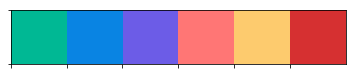

In [15]:
# 设置色板
color_board = ["#00b894", "#0984e3" , "#6c5ce7" , "#ff7675" , "#fdcb6e", "#d63031"]
sns.set_palette(color_board)
sns.palplot(sns.color_palette())

在代码展示的过程中，主要采用下面两个数据集：
- pokemon.csv
    - 
- fuel_econ.csv
    - id:
    - VClass:汽车大小分类
    - displ:发动机排量，单位是升
    - comb:燃油效率,单位英里/加仑(mpg)

In [16]:
df_pokemon = pd.read_csv("data/pokemon.csv")
df_pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [17]:
df_fuel_econ = pd.read_csv("data/fuel_econ.csv")
df_fuel_econ.loc[:, "trans_type"] = df_fuel_econ["trans"].apply(lambda x : x.split(" ")[0])
df_fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


## 单变量探索
### 散点图
一般我们想要研究两个变量之间的关系，会选择散点图，其中X轴表示一个特征值，Y轴表示一个特征值。实现方式：
- plt.scatter
    - alpha : 添加透明度，值介于0(完全透明，不可见) 到 1(完全不透明)之间
   
- sns.regplot : 创建具有回归拟合的散点图
    - reg_fit = False : 删除回归线
    - x_jitter : X轴添加抖动
    - y_jitter : Y轴抖动
    - scatter_kws
        - `'alpha'` : 透明度

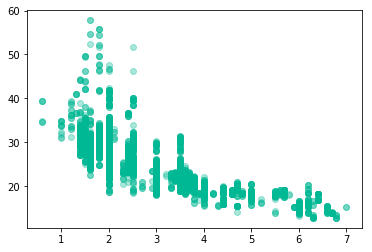

In [19]:
plt.scatter(data=df_fuel_econ, x = "displ", y = "comb", alpha=1/3)

D:\soft\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


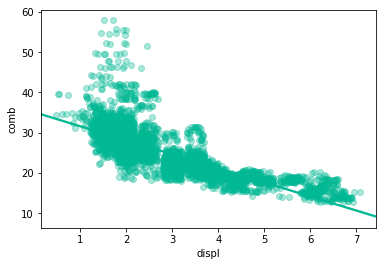

In [38]:
sns.regplot(data=df_fuel_econ, x = "displ", y = "comb", \
            x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3});

## 双变量数据可视化


### 散点图

### 热图

### 小提琴图
小提琴图可以绘制一个数值变量和一个分类变量间的关系。

sns.violinplot，常用参数:
- inner=None，删除箱线图
- inner = "quartile",在小提琴区域绘制三条虚线分别表示三个四分位数

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

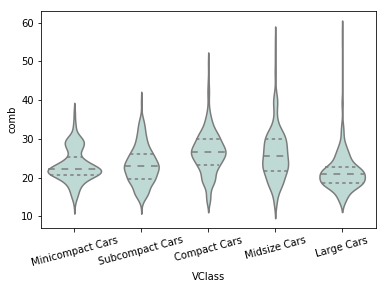

In [94]:
sns.violinplot(data=df_fuel_econ, x="VClass", y="comb",\
        order = ["Minicompact Cars", "Subcompact Cars", "Compact Cars", "Midsize Cars", "Large Cars"], \
        inner = "quartile", \
        color=sns.color_palette()[0])
plt.xticks(rotation = 15)

### 箱线图

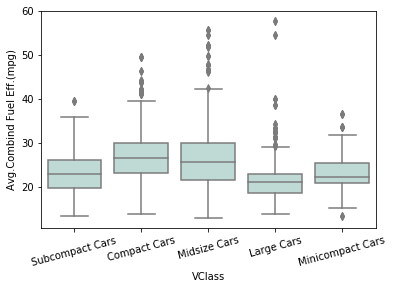

In [92]:
sns.boxplot(data=df_fuel_econ, x="VClass", y="comb",\
        color=sns.color_palette()[0])
plt.xticks(rotation = 15)
plt.ylabel("Avg.Combind Fuel Eff.(mpg)");

### 分组条形图

### 分面(Facet)
分面是处理不同变量级别分布或关系的一种方式，适合于处理包含两个或者多个变量的图表，分面操作将数据划分为不相交的子集，对每个子集，对其他变量绘制相应的图表。

[FactGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)常用参数：
- col_wrap，限制并排放置的分面数
- sharey=False，设置每个分面都有自己的Y轴范围。
- height,设置分面的高度,单位英尺
- col_order，分面排序

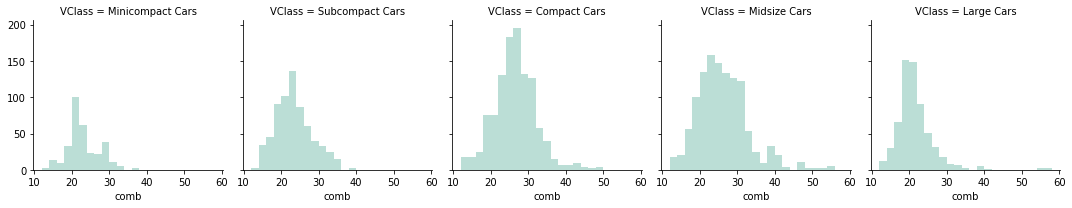

In [47]:
step = 2
bin_edges = np.arange(np.floor(df_fuel_econ["comb"].min()), df_fuel_econ["comb"].max() + step, step)
'''
创建分面图表，需要：
    1. 创建FactGrid对象实例
    2. 指定要分面的特征
'''
g = sns.FacetGrid(data=df_fuel_econ, col = "VClass", \
                  col_order=['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars'])
'''
利用map方法，指定每个子集要绘制的图标类型和变量
'''
g.map(plt.hist, "comb", bins = bin_edges)

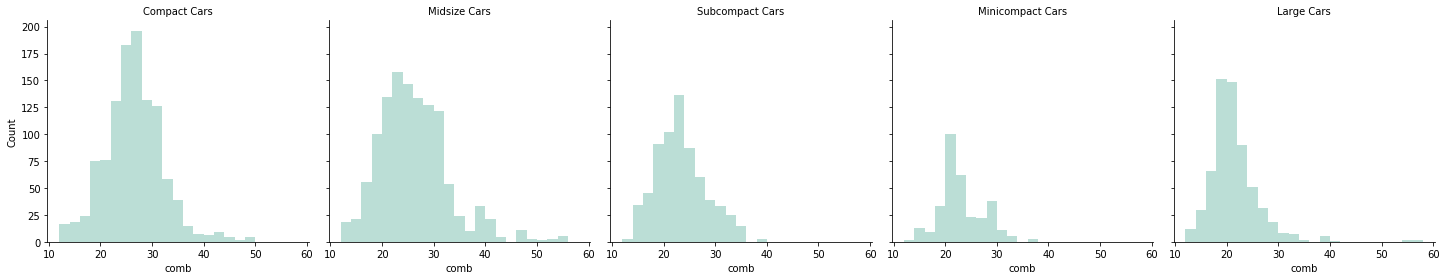

In [48]:
# 计算直方图bin的数量
step = 2
bin_edges = np.arange(np.floor(df_fuel_econ["comb"].min()), df_fuel_econ["comb"].max() + step, step)

# 计算分面排序
group_vclass_means = df_fuel_econ.groupby("VClass").mean()
group_vclass_order = group_vclass_means.sort_values(["comb"], ascending = False).index

g = sns.FacetGrid(data=df_fuel_econ, col="VClass", col_order=group_vclass_order, height=4)
g.map(plt.hist, "comb", bins = bin_edges)

# 将每个分面的标题设置为分类级别名称
g.set_titles("{col_name}")
g.set_ylabels("Count");

### 调整单变量图表
用单变量图表表示双变量关系


sns.barplot利用矩阵条的高度反映数值变量的集中趋势，其中常用参数：
- errwidth=0，删除误差线
- ci = "sd"，显示标准差

sns.pointplot将数据的均值绘制为点，其中常用参数：
- linestyles = ""，删除折线

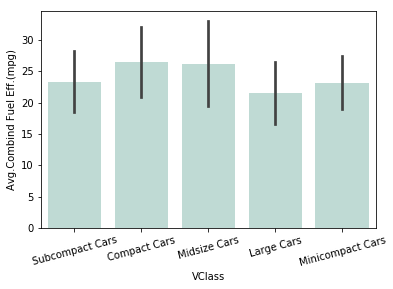

In [81]:
sns.barplot(data=df_fuel_econ, x = "VClass", y="comb", ci = "sd", \
           color=sns.color_palette()[0])
plt.xticks(rotation = 15)
plt.ylabel("Avg.Combind Fuel Eff.(mpg)");

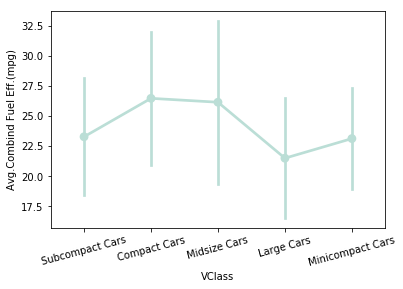

In [80]:
sns.pointplot(data=df_fuel_econ, x = "VClass", y="comb", ci = "sd",\
           color=sns.color_palette()[0])
plt.xticks(rotation = 15)
plt.ylabel("Avg.Combind Fuel Eff.(mpg)");

### 折线图
折线图用于描述一个数值变量相对于另外一个数据变量的数据趋势
- 对数据变化更加感兴趣
- 强调x轴上数据之间的联系，因此如果X轴是无序变量，使用折线图便没有意义。

特殊的数据展现：
- 时间序列图(X轴表示时间)，可使用专业化的sns.tsplot()


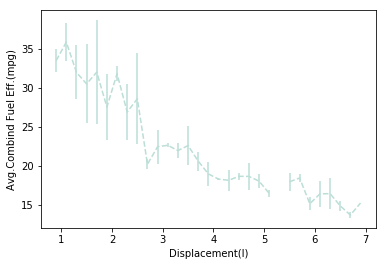

In [102]:
step = 0.2
bins_displ = np.arange(df_fuel_econ["displ"].min(), df_fuel_econ["displ"].max()+step, step)
bins_displ_x = bins_displ[:-1]+ 0.1
displ_binned = pd.cut(df_fuel_econ["displ"], bins_displ, include_lowest=False)
comb_mean = df_fuel_econ["comb"].groupby(displ_binned).mean()
comb_std = df_fuel_econ["comb"].groupby(displ_binned).std()

plt.errorbar(x = bins_displ_x, y = comb_mean, yerr=comb_std, \
            linestyle= "--")
plt.xlabel("Displacement(l)")
plt.ylabel("Avg.Combind Fuel Eff.(mpg)");

以pandas的rolling函数以移动窗口的形式计算概括统计值。

<ErrorbarContainer object of 3 artists>

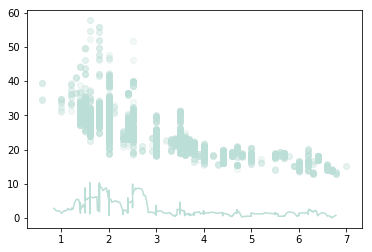

In [116]:
# 计算移动窗口的统计值
df_window = df_fuel_econ.sort_values("displ").rolling(15)
comb_mean = df_window["displ"].mean()
comb_std = df_window["comb"].std()

plt.scatter(data=df_fuel_econ, x = "displ", y = "comb", alpha=0.2)
plt.errorbar(x = comb_mean, y = comb_std)

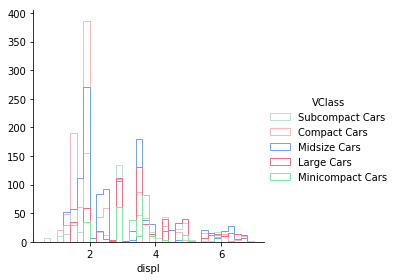

In [24]:
step = 0.2
bins_displ = np.arange(df_fuel_econ["displ"].min(), df_fuel_econ["displ"].max()+step, step)
g = sns.FacetGrid(data=df_fuel_econ, hue="VClass", height=4)
g.map(plt.hist, "displ", bins = bins_displ, histtype = "step")
g.add_legend();

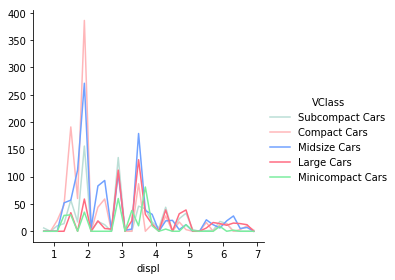

In [25]:
def freq_poly(x, bins = 10, **kwargs):
    """ Custom frequency polygon / line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bins[1:] + bins[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False, include_lowest = True)
    counts = x.groupby(data_bins).count()
    
    plt.errorbar(x = bin_centers, y = counts, **kwargs)

    step = 0.2
bin_edges = np.arange(df_fuel_econ['displ'].min(), df_fuel_econ['displ'].max()+step, step)
g = sns.FacetGrid(data = df_fuel_econ, hue = 'VClass', height=4)
g.map(freq_poly, "displ", bins = bin_edges)
g.add_legend();

### Q-Q图

有时，你可能会想要看看自己的数值数据与一些假设分布的相似程度。这对于某些特定参数的统计检验可能很重要，例如正态性检验。在这种情况下，你可以使用 Q-Q 图,Q 代表 Quantile 分位数，Q-Q图可以绘制你的数据和参考分布的对比图表。

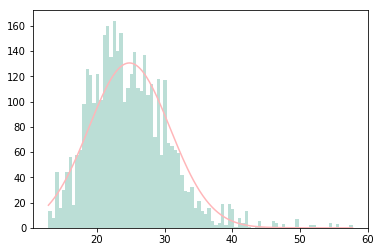

In [19]:
# 创建直方图
bin_size = 0.5
start = df_fuel_econ["comb"].min()
end = df_fuel_econ["comb"].max()
bin_edges = np.arange(start, end + bin_size, bin_size)
plt.hist(data = df_fuel_econ, x = 'comb', bins = bin_edges);

# overlay a theoretical normal distribution on top
samp_mean = df_fuel_econ['comb'].mean()
samp_sd = df_fuel_econ['comb'].std()

x = np.linspace(start, end, 200)
# 正态分布高度(normal distribution heights)
y = norm.pdf(x, samp_mean, samp_sd)
# 由于直方图在y轴上是绝对计数，需要进行曲线缩放
y *= df_fuel_econ.shape[0] * bin_size

plt.plot(x, y)

Text(0,0.5,'Observed Values')

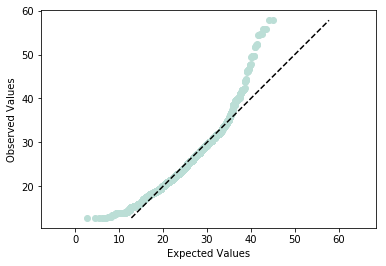

In [28]:
n_points = df_fuel_econ.shape[0]
a = 0.5
qs = (np.arange(n_points) - a) / n_points
expected_vals = norm.ppf(qs, samp_mean, samp_sd)

plt.scatter(expected_vals, df_fuel_econ['comb'].sort_values())
plt.plot([start,end],[start,end],'--', color = 'black')
plt.axis('equal')
plt.xlabel('Expected Values')
plt.ylabel('Observed Values')

### 蜂群图

### 轴须图(Rug Plot)

### 带状图(Strip Plot)

### 叠嶂图(Ridgeline Plot)

### 堆积图

## 多变量数据可视化

### 第三个变量使用非位置编码

#### 形状编码

#### 大小编码

#### 颜色编码
- 分类变量
- 数值变量

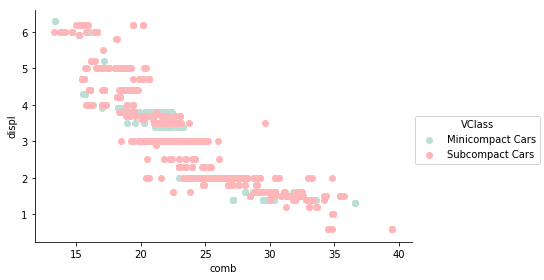

In [41]:
df_fuel_econ_vclass_subset = df_fuel_econ[df_fuel_econ["VClass"].isin(['Minicompact Cars', 'Subcompact Cars'])]
g = sns.FacetGrid(data=df_fuel_econ_vclass_subset, hue="VClass", size = 4,  aspect = 1.5, \
                  hue_order= ['Minicompact Cars', 'Subcompact Cars']) 
g.map(plt.scatter, 'comb', "displ")
g.add_legend();

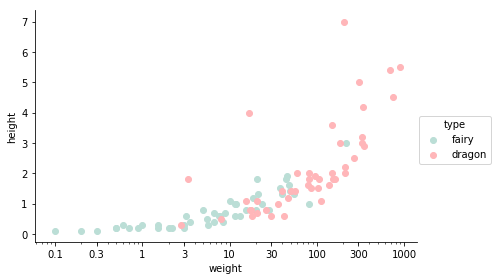

In [47]:
#重塑数据，让所有宝可梦的属性（type）都出现在一个列里
type_cols = ['type_1','type_2']
non_type_cols = df_pokemon.columns.difference(type_cols)
df_pkmn_types = df_pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, 
            var_name = 'type_level', value_name = 'type').dropna()

x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]

df_pkmn_types_subset = df_pkmn_types.loc[pkmn_types['type'].isin(['fairy','dragon'])]
g = sns.FacetGrid(data=df_pkmn_types_subset, hue = "type", size = 4, aspect =1.5)
g.map(plt.scatter, "weight",  "height").set(xscale = 'log')
g.set(xticks = x_ticks, xticklabels = x_ticks)
g.add_legend();

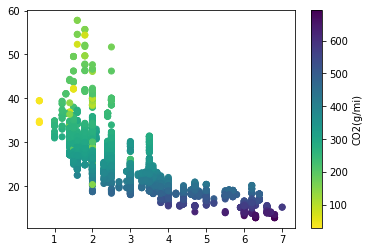

In [26]:
plt.scatter(data = df_fuel_econ,x = 'displ',y = 'comb',  c = 'co2', cmap = "viridis_r")
plt.colorbar(label = "CO2(g/mi)");

### 调色板
根据不同的数据类型，选用不同的调色板。调色板类型主要有三种类型：分类的（qualitative 或 categorical），有序的（sequential）和发散的（diverging）。

Seaborn有自己内置的调色板：
- 分类（0.8 版本 6 个颜色，0.9 版本 10 个颜色） :'deep', 'pastel', 'dark', 'muted', 'bright', 'colorblind'
- 有序： 'rocket'（白-橙-红-紫-黑），'mako'（薄荷绿-绿-蓝-紫-黑）
- 发散： 'vlag'（蓝-白-红），'icefire'（蓝-黑-橙）

- 分类调色板针对无序分类变量,对于分类调色板，相邻的颜色之间是非常不同的，因为它不包含级别的信息。

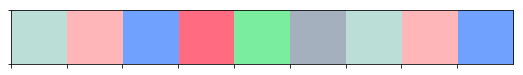

In [21]:
sns.palplot(sns.color_palette(n_colors=9))

- 有序调色板，对有序变量和数值变量， 应该采用有序调色板和发散调色板。在有序调色板中，颜色应该具有一定的顺序。通常，这会通过单个或小范围几个色调的明暗程度来表示，其中浅色表示低值，深色表示高值。有序调色板的默认调色板为 "viridis"，它则是用深色表示低值，浅色表示高值。

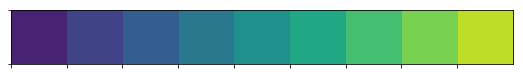

In [22]:
sns.palplot(sns.color_palette('viridis', 9))

- 发散调色板，大多数情况下，有序调色板能比较好地描绘有序变量或数值变量。但如果存在一个有意义的零点或者存在一个中心值，那你应该考虑使用发散型调色板。发散调色板可以由两个有序调色板头尾拼接得到，中间的颜色为两个调色板的共同颜色（通常是白色或者灰色）。其中一个色调代表大于中心点的数据，另一个色调代表小于中心点的数据。

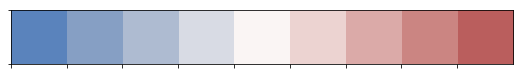

In [23]:
sns.palplot(sns.color_palette('vlag', 9))

### 分面
- margin_titles = True:将两个变量的标签分别放到图表右方和上方

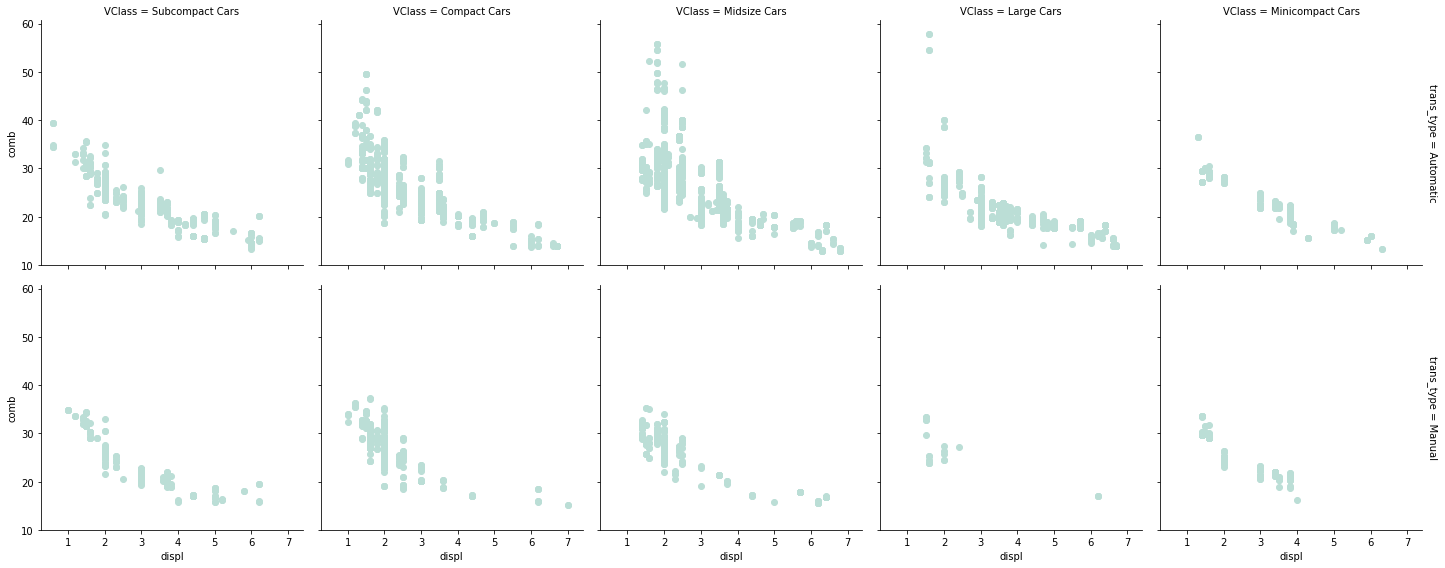

In [30]:
g = sns.FacetGrid(data = df_fuel_econ, col = 'VClass', row = 'trans_type', size = 4,
                margin_titles = True)
g.map(plt.scatter, 'displ', 'comb');

### 双变量图表的其他调整方式

D:\soft\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


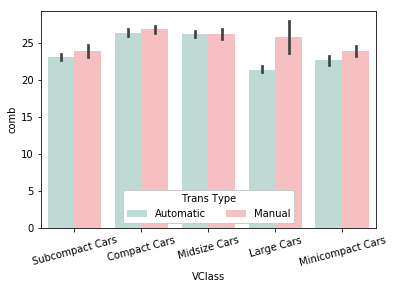

In [38]:
ax = sns.barplot(data=df_fuel_econ, x = "VClass", y = "comb", hue = "trans_type")
plt.xticks(rotation = 15)
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Trans Type')

D:\soft\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


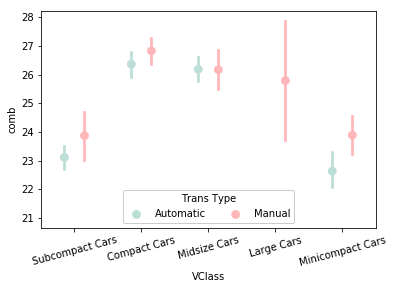

In [44]:
ax = sns.pointplot(data=df_fuel_econ, x = "VClass", y = "comb", hue = "trans_type", linestyles = "", dodge = 0.3)
plt.xticks(rotation = 15)
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Trans Type');

**热力图**

### 图表矩阵（Plot Matrix）

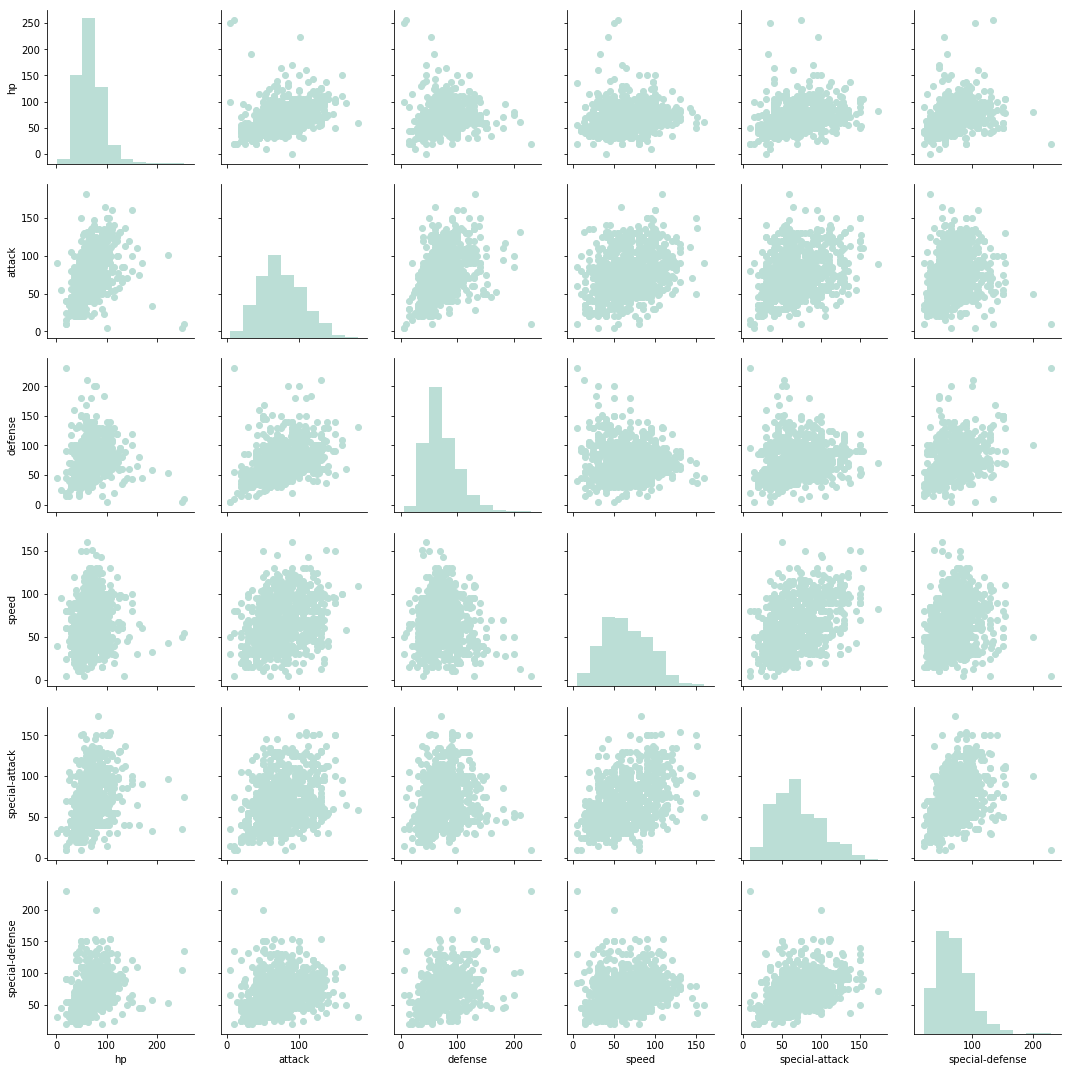

In [46]:
display_list = ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']
g = sns.PairGrid(data = df_pokemon, vars = display_list)
# 设置对角线数据的显示方式
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

#### 相关系数矩阵


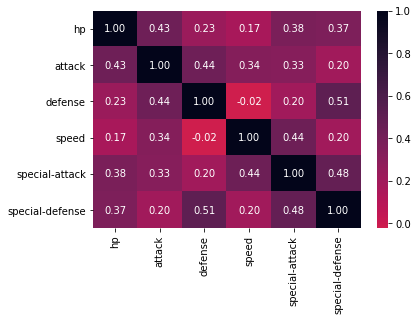

In [52]:
display_list = ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']
sns.heatmap(df_pokemon[display_list].corr(), annot = True, fmt = '.2f', cmap = 'rocket_r', center = 0);

### 特征工程

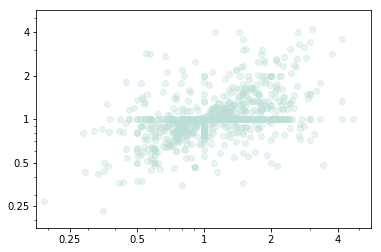

In [67]:
df_pokemon["attack_ratio"] = df_pokemon["attack"] / df_pokemon["special-attack"]
df_pokemon["defense_ratio"] = df_pokemon["defense"] / df_pokemon["special-defense"]
plt.scatter(data=df_pokemon, x = "attack_ratio", y ="defense_ratio", alpha=1/3)
plt.xscale("log")
plt.yscale("log")
tick_loc = [0.25, 0.5, 1, 2, 4]
plt.xticks(tick_loc, tick_loc)
plt.yticks(tick_loc, tick_loc)
# 移除异常值
plt.xlim(2**-2.5, 2**2.5)
plt.ylim(2**-2.5, 2**2.5);